<a href="https://colab.research.google.com/github/KLeeDE/Data-Science/blob/master/Energy%20Consumption%20and%20Population%20Characteristics%20in%20Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSTEP20 // Assignment #4 **(GGD: Total = 56 / 60 - VERY GOOD!)**

assigned : **Jan 31, 2020**

DUE : **Feb 6, 2020 11:59pm**

## Energy Consumption and Population Characteristics in Chicago

<img src="https://cdnassets.hw.net/fd/79/255c2257450aabb327cc6b1fc648/1219-chicago-hero-tcm20-2182339.jpg" width=500>

---

**The Scenario:** You are working for a non-profit that is consulting with the City of Chicago on future planning for energy distribution needs.  Your team is large and consists of groups that study building characteristics and energy consumption as well as groups that study population predictions and growth estimates.  Taken together, they can create a model for future population growth and infrastructure, but they are missing a key piece of the puzzle: how usage characteristics of the population scales with social and economic factors.  The hypothesis is that there may be link between the two given the link between [energy consumption per person and GDP per capita](https://ourworldindata.org/grapher/energy-use-per-capita-vs-gdp-per-capita) on a global scale.

**The Problem Statement:** Your job is to explore the economic and social dimension of the problem by combining recently released energy consumption data in Chicago with data from the Census on population characteristics by Census Tract <small>(note, the consumption data exists at the census block level, but being well versed in the census, you know that census block estimates have significant uncertainty, and so the decision is made to focus on the Census Tract level)</small>.  As with the last assignment, **the deliverable for this assignment is a complete, end-to-end data science workflow similar to those we've seen before, including 1) Background information on the problem and data sets, 2) Data description and summary, 3) Analysis and visualizations, and 4) Summary of findings.**

**Useful Data Sets:**  Data sets to be used for this task include the [Energy Usage Data](https://data.cityofchicago.org/Environment-Sustainable-Development/Energy-Usage-2010/8yq3-m6wp), the [Census Tract shapes](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik) in Chicago, and the [2010 Census Data at American Fact Finder](https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t).

# **1) Background information on the problem and data sets**


**Relationship between energy consumtion and economic features:**
As the city is developed based on the consumption of natural resources, environmental and social problems has been rapidly emerged as major problems. According to [Hackett, &Ltzenhiser(1991)](https://link.springer.com/article/10.1007/BF01114472), "the role of marginal price in ordering consumption" influenced feature of the consumption and social status, which result in change of the social structure. In economic theory,[Environmental Kuznets Curve (EKC)](https://www.intelligenteconomist.com/environmental-kuznets-curve/) graphs the hypoteheis that the ennvironment is detroyed when economies (per capita income) developed, however, as the economies are more developed then the money is invested back into the environment.Therefore, it is important to find the relationship between the conumption of natural resources and the economic features [(Eden et al., 1992; Bilgili, 2016; Soytas et al., 2007)](https://www.sciencedirect.com/science/article/abs/pii/S0921800906003430). Then, it is possible to determine what the stage will be in EKC.

![Environmental Kuznets Curve](https://www.intelligenteconomist.com/wp-content/uploads/2018/03/Environmental-Kuznets-Curve.png)


**Energy consumption and economic features in the city of chicago:**
The City of Chicago has been developed as one of the big cities in United States. The [Cook County](https://en.wikipedia.org/wiki/Cook_County), where the Chicago is located, grew rapidly after 1945. The city was under control, however, it grew up as a financial and transportation hub in Illinois as well as United States. However, the exponential growth results in increasing pollution on the environment and health issues impacting citizens in the city [(Cumbler,2005)](https://books.google.com/books?id=GlF_yi-5lrcC&pg=PA139#v=onepage&q&f=false). According to the [U.S, Energy Information Administration (EIA) ](https://www.eia.gov/state/?sid=IL), Illinos is the fifth-largest energy-consuming state in the nation, and its industrial sector uses the most energy of any sector. Also, Illinois ranked first in the nation in 2018 in net electricity generation (EIA data portal, 2020)  

**Research question:**
Based on the previous study, it is important to know the relationship between energy consumption and economic features in the City of Chicago in order to consider environmental protection and economic development in urban planning  ([Cumbler (2005)](https://books.google.com/books?id=GlF_yi-5lrcC&pg=PA139#v=onepage&q&f=false); [Hackett, &Ltzenhiser (1991)](https://link.springer.com/article/10.1007/BF01114472)). Therefore, the research question in this study aims to find if the significant relationship between energy conumption per household and household income is found. 

**References:**

Bilgili, F., Koçak, E., & Bulut, Ü. (2016). The dynamic impact of renewable energy consumption on CO2 emissions: a revisited Environmental Kuznets Curve approach. Renewable and Sustainable Energy Reviews, 54, 838-845.

Cook County. Wikipedia. Retrieved 2/6/2020 from: https://en.wikipedia.org/wiki/Cook_County

Cumbler, J. (2005). Northeast and Midwest United States: An Environmental History. ABC-CLIO. p. 139.

Eden, S. H., & Jin, J. C. (1992). Cointegration tests of energy consumption, income, and employment. Resources and energy, 14(3), 259-266.

Environmental Kuznets Curve. Intelligent Economist. Retrieved 2/6/2020 from: https://www.intelligenteconomist.com/environmental-kuznets-curve/

Hackett, B., & Lutzenhiser, L. (1991, September). Social structures and economic conduct: interpreting variations in household energy consumption. In Sociological forum (Vol. 6, No. 3, pp. 449-470). Kluwer Academic Publishers-Plenum Publishers.

Illinois. U.S. Energy Information Administration (EIA). Retrieved 2/6/2020 from: https://www.eia.gov/state/?sid=IL

Soytas, U., Sari, R., & Ewing, B. T. (2007). Energy consumption, income, and carbon emissions in the United States. Ecological Economics, 62(3-4), 482-489.



# **2) Data description and summary**

In [1]:
# Data description

print("Data Description")
print("")

d = {1: ["Census Block", "Census Block number obtained in the address matching/geocoding algorithms", 'Number'],
     2: ["Total kWh", "(Electricity) Total 2010 kWh from ComEd accounts", 'Number'],
     3: ["Total Therms", "(Gas) Total 2010 Therms from People accounts", 'Number'],
     4: ["Total Population", "Total population from Census 2010 report", 'Number'],
     5: ["Total Units", "Total number of housing units from census 2010", 'Number'],
     6: ["GEO.id2", "GEOID", 'Number'],
     7: ["HC01_EST_VC01", "Estimated households", 'Number'],
     8: ["HC01_EST_VC15", "Estimated households of mean income", 'Number(Units: dollars)'],
     }

print ("{:<5} {:<20} {:<80} {:<10}".format('No.','Column Name','Description', 'Type'))
for k, v in d.items():
    lang, perc, change = v
    print ("{:<5} {:<20} {:<80} {:<10}".format(k, lang, perc, change))


Data Description

No.   Column Name          Description                                                                      Type      
1     Census Block         Census Block number obtained in the address matching/geocoding algorithms        Number    
2     Total kWh            (Electricity) Total 2010 kWh from ComEd accounts                                 Number    
3     Total Therms         (Gas) Total 2010 Therms from People accounts                                     Number    
4     Total Population     Total population from Census 2010 report                                         Number    
5     Total Units          Total number of housing units from census 2010                                   Number    
6     GEO.id2              GEOID                                                                            Number    
7     HC01_EST_VC01        Estimated households                                                             Number    
8     HC01_EST_VC15        Est

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

!pip install geopandas
import geopandas as gp

import matplotlib.pyplot as plt

     |████████████████████████████████| 931kB 2.9MB/s 
     |████████████████████████████████| 10.4MB 10.7MB/s 
     |████████████████████████████████| 14.7MB 48.0MB/s 


In [3]:
# Structure of Geospatial data

# Dataset1
fname1 = "https://data.cityofchicago.org/api/views/8yq3-m6wp/rows.csv?accessType=DOWNLOAD"
dscc = pd.read_csv(fname1)
nan = dscc[~dscc["CENSUS BLOCK"].isnull()]
print("Numner of NaNs in Energy Consumption Data: {0}".format(len(dscc)))
print("Number of NaNs in Energy Consumption Data: {0}". format(len(nan)))
print("Number of NaNs in CENSUS BLOCK: {0}".format(len(dscc)-len(nan)))

dscc = nan.fillna(0.0)
dscc.head()

# Dataset2
from google.colab import drive
drive.mount("/content/drive")
fname2 = "drive/My Drive/Colab Notebooks/aff_download_IL/ACS_10_5YR_S1901_with_ann.csv"
aff = pd.read_csv(fname2)
aff.head()

# Dataset3: Geodata
gdat = gp.read_file("https://data.cityofchicago.org/api/geospatial/5jrd-6zik?method=export&format=GeoJSON")
print(gdat.head())

Numner of NaNs in Energy Consumption Data: 67051
Number of NaNs in Energy Consumption Data: 66974
Number of NaNs in CENSUS BLOCK: 77
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
  statefp10  ...                                           geometry
0        17  ...  MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ...
1        17  ...  MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ...
2        17  ...  MULTIPOLYGON (((-87.62935 41.85280, -87.62934 ...
3        17  ...  MULTIPOLYGON (((-87.68813 41.85569, -87.6

(-87.96107629997518, -87.50283170000732, 41.62530410001136, 42.042905899965575)

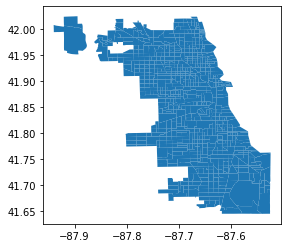

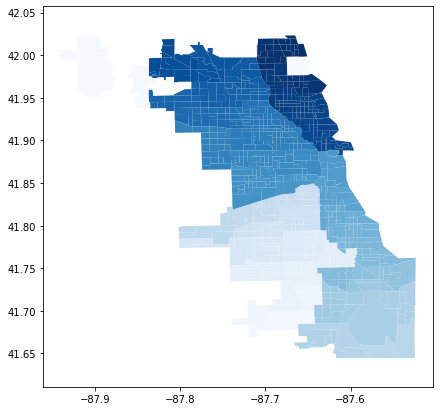

In [4]:
gdat.plot()
gdat["commarea"] = gdat["commarea"].astype(float)
gdat["commarea_n"] = gdat["commarea_n"].astype(float)

# Make a CHOROPLETH
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[7,7])
gdat.plot("commarea", cmap="Blues_r", ax=ax)
ax.axis("equal")

In [5]:
# Nan Zero
nan = dscc[~dscc["CENSUS BLOCK"].isnull()]
print("Numner of NaNs in Energy Consumption Data: {0}".format(len(dscc)))
print("Number of NaNs in Energy Consumption Data: {0}". format(len(nan)))
print("Number of NaNs in CENSUS BLOCK: {0}".format(len(dscc)-len(nan)))

dscc = nan.fillna(0.0)
print(dscc.head())

Numner of NaNs in Energy Consumption Data: 66974
Number of NaNs in Energy Consumption Data: 66974
Number of NaNs in CENSUS BLOCK: 0
  COMMUNITY AREA NAME  ...  OCCUPIED HOUSING UNITS
0      Archer Heights  ...                    23.0
1             Ashburn  ...                    62.0
2      Auburn Gresham  ...                    34.0
3              Austin  ...                    41.0
4              Austin  ...                    19.0

[5 rows x 73 columns]


In [6]:
cols = dscc.columns [[0, 1, 2, 16, 31, 63, 64]]
dscc2 = dscc[cols]
dscc2.columns = ["area_n", "cblock", "building_t", "kwh_t", "therms_t", "pop_t", "units_t"]
print(gdat.head())
print("")
print(dscc2.head())

  statefp10  ...                                           geometry
0        17  ...  MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ...
1        17  ...  MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ...
2        17  ...  MULTIPOLYGON (((-87.62935 41.85280, -87.62934 ...
3        17  ...  MULTIPOLYGON (((-87.68813 41.85569, -87.68816 ...
4        17  ...  MULTIPOLYGON (((-87.63312 41.87449, -87.63306 ...

[5 rows x 10 columns]

           area_n        cblock   building_t    kwh_t  therms_t  pop_t  units_t
0  Archer Heights  1.703157e+14  Residential      0.0   10917.0   89.0     24.0
1         Ashburn  1.703170e+14  Residential  82064.0       0.0  112.0     67.0
2  Auburn Gresham  1.703171e+14   Commercial      0.0    6057.0  102.0     48.0
3          Austin  1.703125e+14   Commercial      0.0     400.0  121.0     56.0
4          Austin  1.703125e+14   Commercial      0.0     949.0   62.0     23.0


In [7]:
# Fix "cblock" as a type of "geoid"
# Then, combine "geoid10" and "cblock"

dscc2["cblock_id"] = dscc2["cblock"].astype(float)
dscc2["cblock_id2"] = dscc2["cblock_id"] / 10000
dscc2["cblock_id3"] = dscc2["cblock_id2"].astype(str)
dscc2["cblock_id4"] = dscc2["cblock_id3"].str.split(".")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [0]:
lcblock = dscc2["cblock_id4"].to_list()

In [9]:
temp = pd.DataFrame(lcblock, columns=["cblock_id5", "block"])
temp2 = temp.groupby("cblock_id5").sum().reset_index()
temp2["cblock_id5"] = temp2["cblock_id5"].astype(str)
print(temp2.head())

    cblock_id5                                              block
0  17031010100  2005300920041100120011002100210021003100310031...
1  17031010201  2001201810062014101130112301111100110011002100...
2  17031010202  2006200911110011001100110031004100410041004100...
3  17031010300  2002230052011100340074007300211006110011001100...
4  17031010400  1006301330032001301121200511100110011001100510...


In [10]:
dscc2["cblock_id5"] = temp2["cblock_id5"].astype(str)
dscc["GEOID10"] = dscc2["cblock_id5"]
print(dscc.head())

  COMMUNITY AREA NAME  CENSUS BLOCK  ... OCCUPIED HOUSING UNITS      GEOID10
0      Archer Heights  1.703157e+14  ...                   23.0  17031010100
1             Ashburn  1.703170e+14  ...                   62.0  17031010201
2      Auburn Gresham  1.703171e+14  ...                   34.0  17031010202
3              Austin  1.703125e+14  ...                   41.0  17031010300
4              Austin  1.703125e+14  ...                   19.0  17031010400

[5 rows x 74 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# dscc3 = dscc + dscc2(new CENSUS BLOCK)
dscc3 = dscc.groupby("GEOID10").sum().reset_index()

In [0]:
gdatm = gdat.merge(dscc3, left_on = "geoid10", right_on = "GEOID10")

In [0]:
# Step1: make independent varialbe (merge electricity and therms)
pd.set_option('display.max_columns', 100)

In [14]:
# Dependent variable: Energy consumption per household 
# Case1: ("Elec_h") = Total(kwh) / Total units 
# Case2: ("Thms_h") = Total (thms) / Total units 
# Case3: ("Energy_h") = {Total(kwh) + Total (thms)} / Total units 
cols2 = dscc3.columns [[0, 13, 27, 59]]
dscc_m = dscc[cols2]
dscc_m.columns = ["Geoid", "t_kwh", "t_thms", "t_housing"]
nan_m = dscc_m[~dscc_m["Geoid"].isnull()]
dscc_m = nan_m.fillna(0.0)
dscc_m2 = pd.DataFrame({"Geoid": dscc_m["Geoid"], 
                        "Elec_h": dscc_m["t_kwh"] / dscc_m["t_housing"],
                        "Thms_h": dscc_m["t_thms"] / dscc_m["t_housing"],
                        "Energy_h": (dscc_m["t_kwh"] + dscc_m["t_thms"]) / dscc_m["t_housing"]}, 
                       columns = ["Geoid", "Elec_h", "Thms_h", "Energy_h"])
dscc_t = dscc_m.merge(dscc_m2, left_on = "Geoid", right_on = "Geoid")

# Dependent variable: 
# Case1:Estimated households of mean income (HC01_EST_VC15): (Unit: dollars)
aff_m = pd.DataFrame(columns = ["GEO.id2", "HC01_EST_VC15"], data=aff)
aff_m["Geoid2"] = aff_m["GEO.id2"]
aff_m["h_incm"] = aff_m["HC01_EST_VC15"]
nan_m2 = aff_m[~aff_m["Geoid2"].isnull()]
aff_m = nan_m2.fillna(0.0)
aff_m = aff_m.replace("-",0.0)

final = dscc_t.merge(aff_m, left_on = "Geoid", right_on = "Geoid2")
final = final.replace(np.inf,0.0)
print(final.head())
print("")
final["h_incm"] = final["h_incm"].astype(float)
print(final.dtypes)

         Geoid    t_kwh  t_thms  t_housing      Elec_h     Thms_h    Energy_h  \
0  17031010100      0.0  2112.0       89.0    0.000000  23.730337   23.730337   
1  17031010201  19676.0     0.0      112.0  175.678571   0.000000  175.678571   
2  17031010202      0.0     0.0      102.0    0.000000   0.000000    0.000000   
3  17031010300      0.0   391.0      121.0    0.000000   3.231405    3.231405   
4  17031010400      0.0     0.0       62.0    0.000000   0.000000    0.000000   

       GEO.id2 HC01_EST_VC15       Geoid2 h_incm  
0  17031010100         51153  17031010100  51153  
1  17031010201         52591  17031010201  52591  
2  17031010202         47699  17031010202  47699  
3  17031010300         57075  17031010300  57075  
4  17031010400         58457  17031010400  58457  

Geoid             object
t_kwh            float64
t_thms           float64
t_housing        float64
Elec_h           float64
Thms_h           float64
Energy_h         float64
GEO.id2           object
HC01_E

In [15]:
# Step 2: Data Statistics of Dependent Variable
print("range of electricity per household = [{0}, {1}]".format(np.min(final["Elec_h"]), np.max(final["Elec_h"])))
print("mean of electricity per household = {0}".format(np.mean(final["Elec_h"])))
print("median of electricity per household = {0}".format(np.median(final["Elec_h"])))
print("standard deviation of electricity per household = {0}".format(np.std(final["Elec_h"])))   
print("")

print("range of therm per household = [{0}, {1}]".format(np.min(final["Thms_h"]), np.max(final["Thms_h"])))
print("mean of therm per household = {0}".format(np.mean(final["Thms_h"])))
print("median of therm per household = {0}".format(np.median(final["Thms_h"])))
print("standard deviation of therm per household = {0}".format(np.std(final["Thms_h"])))   
print("")

print("range of energy consumption per household = [{0}, {1}]".format(np.min(final["Energy_h"]), np.max(final["Energy_h"])))
print("mean of energy consumption per household = {0}".format(np.mean(final["Energy_h"])))
print("median of energy consumption per household = {0}".format(np.median(final["Energy_h"])))
print("standard deviation of energy consumption per household = {0}".format(np.std(final["Energy_h"])))   
print("")

print("range of estimated households of mean income = [{0}, {1}]".format(np.min(final["h_incm"]), np.max(final["h_incm"])))
print("mean of estimated households of mean income  = {0}".format(np.mean(final["h_incm"])))
print("median of estimated households of mean income  = {0}".format(np.median(final["h_incm"])))
print("standard deviation of estimated households of mean income  = {0}".format(np.std(final["h_incm"])))   
print("")

range of electricity per household = [0.0, 667899.6666666666]
mean of electricity per household = 1068.5967669434804
median of electricity per household = nan
standard deviation of electricity per household = 24162.245303764063

range of therm per household = [0.0, 34342.666666666664]
mean of therm per household = 73.65411603556043
median of therm per household = nan
standard deviation of therm per household = 1274.73930406325

range of energy consumption per household = [0.0, 667899.6666666666]
mean of energy consumption per household = 1094.3834575420594
median of energy consumption per household = nan
standard deviation of energy consumption per household = 23703.394806856093

range of estimated households of mean income = [0.0, 232353.0]
mean of estimated households of mean income  = 63736.333333333336
median of estimated households of mean income  = 54418.0
standard deviation of estimated households of mean income  = 33630.129534828506



# **3) Analysis and Visualizations**

In [16]:
import statsmodels.formula.api as sm

# Case1: 
# independent variable (x) = Estimated households of mean income  
# dependent variable (y) = ("Elec_h") = Total(kwh) / Total units 
model1 = sm.ols("Elec_h ~ h_incm", data=final)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Elec_h   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07656
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.782
Time:                        22:41:05   Log-Likelihood:                -8829.3
No. Observations:                 767   AIC:                         1.766e+04
Df Residuals:                     765   BIC:                         1.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1528.6868   1878.332      0.814      0.4

In [17]:
# Case2: y = ("Thms_h") = Total (thms) / Total units 
model2 = sm.ols("Thms_h ~ h_incm", data=final)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Thms_h   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03093
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.860
Time:                        22:41:05   Log-Likelihood:                -6375.6
No. Observations:                 744   AIC:                         1.276e+04
Df Residuals:                     742   BIC:                         1.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.5760    101.909      0.879      0.3

In [18]:
# Case3: y = ("Energy_h") = {Total(kwh) + Total (thms)} / Total units 
model3 = sm.ols("Energy_h ~ h_incm", data=final)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:               Energy_h   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07859
Date:                Sat, 28 Mar 2020   Prob (F-statistic):              0.779
Time:                        22:41:05   Log-Likelihood:                -9182.3
No. Observations:                 799   AIC:                         1.837e+04
Df Residuals:                     797   BIC:                         1.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1540.3467   1798.715      0.856      0.3

(-87.87896629998619, -87.5067417000068, 41.625343550009035, 42.042077450014474)

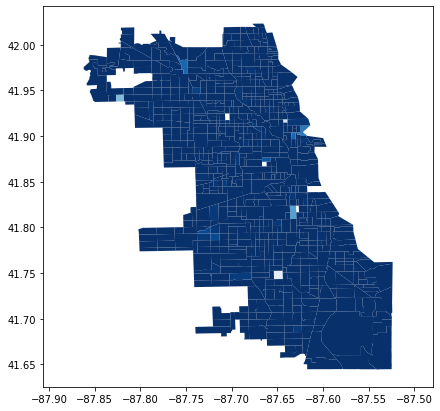

In [19]:
# Visualization

fig, ax = plt.subplots(figsize=[7,7])
gdatm.plot("TOTAL KWH", ax=ax, cmap="Blues_r")
ax.axis("equal")

(-87.87896629998619, -87.5067417000068, 41.625343550009035, 42.042077450014474)

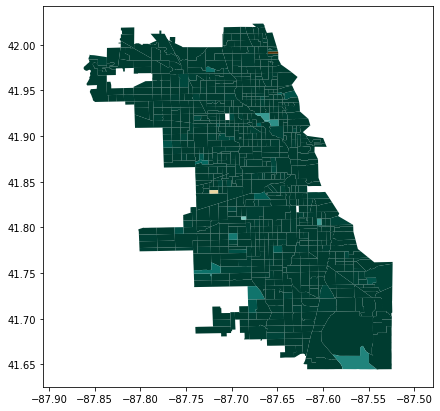

In [20]:
fig, ax = plt.subplots(figsize=[7,7])
gdatm.plot("TOTAL THERMS", ax=ax, cmap="BrBG_r")
ax.axis("equal")

(-87.87896629998619, -87.5067417000068, 41.625343550009035, 42.042077450014474)

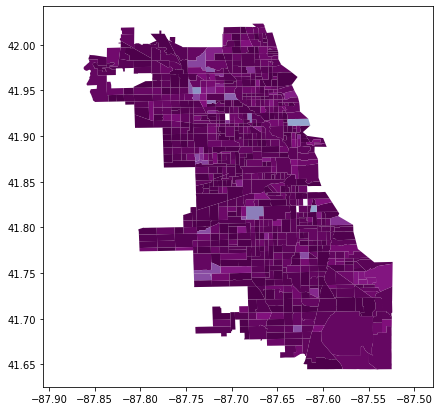

In [21]:
fig, ax = plt.subplots(figsize=[7,7])
gdatm.plot("TOTAL POPULATION", ax=ax, cmap="BuPu_r")
ax.axis("equal")

(-87.87896629998619, -87.5067417000068, 41.625343550009035, 42.042077450014474)

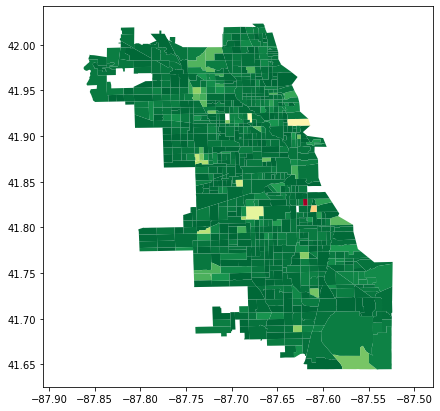

In [22]:
fig, ax = plt.subplots(figsize=[7,7])
gdatm.plot("TOTAL UNITS", ax=ax, cmap="RdYlGn_r")
ax.axis("equal")

(-87.87896629998619, -87.5067417000068, 41.625343550009035, 42.042077450014474)

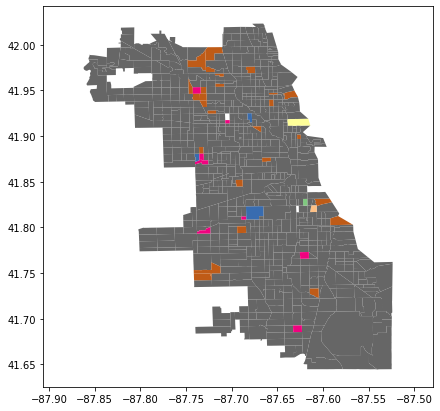

In [23]:
fig, ax = plt.subplots(figsize=[7,7])
gdatm.plot("OCCUPIED HOUSING UNITS", ax=ax, cmap="Accent_r")
ax.axis("equal")

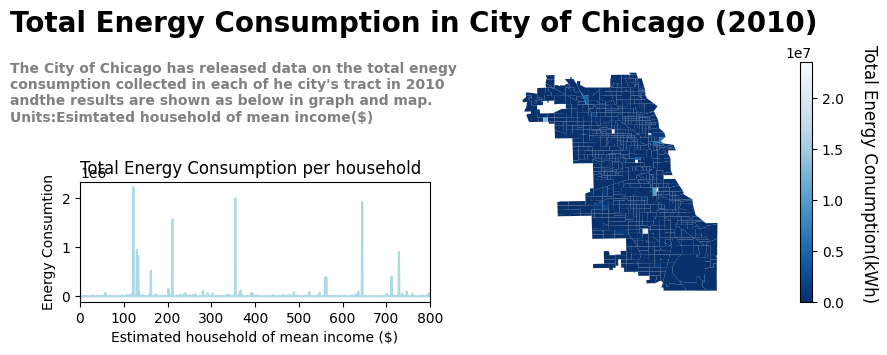

In [24]:
# -- now visualize

plt.style.use("default")

fig = plt.figure(figsize=[10,3])
ax  = fig.add_axes([0.5, 0.05, 0.4, 0.8])
gdatm.plot("TOTAL KWH", cmap="Blues_r", legend=True, ax=ax)
ax.axis("equal")
ax.axis("off")

ax2  = fig.add_axes([0.12, 0.05, 0.35, 0.4])
final.plot(y="t_kwh", use_index=True, color="lightblue", legend=False, ax=ax2)
ax2.set_xlabel("")
ax2.set_title("Total Energy Consumption per household", loc="left")
xlab = ax2.set_xlabel("Estimated household of mean income ($)")
ylab = ax2.set_ylabel("Energy Consumtion")

cbt = fig.text(0.9, 0.475, "Total Energy Conumption(kWh)", rotation=-90, fontsize=12, va="center", color="black")
header = fig.text(0.05, 0.95, "Total Energy Consumption in City of Chicago (2010)", fontsize=20, color="black", weight="bold")
subheader = fig.text(0.05, 0.85, 
         "The City of Chicago has released data on the total enegy \nconsumption " +
         "collected in each of he city's tract in 2010 \nand" + 
         "the results are shown as below in graph and map.\nUnits:" +
         "Esimtated household of mean income($)", color="grey", weight="bold", va="top")


# **4) Summary of Findings**

**Key points:** The purpose of this analysis is to find the relationship between energy conumption per household and estimated household of mean income based on the Economic Kuznets Curve theory. The main result of this analysis implies that the energy consumption per household does not show significant relationship between household of mean income as stated in the background. The graphs above illustrate the energy consumption per households at 100-mean income intervals. The horizontal axis (x-axis) shows mean income from 0 to 800. For the data source, the “City of Chicago Data Poral” and “American Fact Finder Data Poral” were used, and the linear model and quadratic model were used for this analysis. R-squared in the linear model indicates that the linear and quadratic model does not fit. If the data is correct, we can predict that the energy consumption per household will be not increased as the economic income per household is increased.    

**Shortcomings:** However, it has a shortcoming that it has the limited independent variables. First, this analysis only considered the electricity as as a dependent variable representing energy consumption and household as an independent variable. There can be more independent variables which are statistically significant to influence dependent variable such as coal, crude oil, natural gas, described in [EIA](https://www.eia.gov/state/?sid=IL). Second, the data source is limited to the data portal of City of Chicago and American Fact Finder, which only involve 2010 datasets. Therefore, the data is limited to 2010 and the result can be different now. 

**Potential biases:** This analysis shows the similar prediction that the enerfy consumption will continue to rise well beyond 2010. However, this analysis can be potential biased because of the limited independent variables and data source. 

**Inaccuracies:** Also, this analysis can be inaccurate based on the different characteristic economic and social features based on the previous research ([Hackett, &Ltzenhiser, 1991)](https://link.springer.com/article/10.1007/BF01114472). The author only considered income of households, therefore the result can be possibly inaccurate. 

**Assumptions:** In this analysis, the author assumes the other variables except independent variable will be constant, which means did not consider it as a factor to influence dependent variable. 

**Approximations:** Note that this analysis is only approximate; meaning that it is similar but not equal to the actual result. Prerequisite for the accurate approximations is a sufficient sample size of data. 
